In [17]:
import numpy as np
import pandas as pd
from IPython.display import display

In [18]:
df = pd.read_csv('../cnn2_output/predict.csv')
display(df[:50])

,fname,label,prob
0,clip_000044442.wav,no,0.999959
1,clip_0000adecb.wav,unknown,1.000000
2,clip_0000d4322.wav,unknown,0.999713
3,clip_0000fb6fe.wav,up,0.888374
4,clip_0001d1559.wav,unknown,1.000000
5,clip_0002256ed.wav,unknown,1.000000
6,clip_0002a4a1f.wav,unknown,0.998953
7,clip_0002d9b83.wav,unknown,1.000000
8,clip_000373a5b.wav,go,1.000000
9,clip_0003c7122.wav,unknown,0.949792


In [19]:
filenames = df.fname.tolist()
pred = df.label.tolist()
prob = df.prob.tolist()
print filenames[:10]
print pred[:10]
print prob[:10]

['clip_000044442.wav', 'clip_0000adecb.wav', 'clip_0000d4322.wav', 'clip_0000fb6fe.wav', 'clip_0001d1559.wav', 'clip_0002256ed.wav', 'clip_0002a4a1f.wav', 'clip_0002d9b83.wav', 'clip_000373a5b.wav', 'clip_0003c7122.wav']
['no', 'unknown', 'unknown', 'up', 'unknown', 'unknown', 'unknown', 'unknown', 'go', 'unknown']
[0.99995875359099995, 1.0, 0.99971312281000002, 0.88837379217099999, 1.0, 0.99999982118599995, 0.99895334243800005, 1.0, 1.0, 0.94979161024100001]


In [20]:
Hyper_ratio= 0.33

In [21]:
dic = {'fname':[], 'label':[]}
for i in range(len(filenames)):
    if prob[i] < Hyper_ratio:
        pred[i] = 'unknown'
dic['fname'] = filenames
dic['label'] = pred
df_convert = pd.DataFrame(dic)
df_convert.set_index('fname', inplace = True)
display(df_convert[:10])

,label
fname,
clip_000044442.wav,no
clip_0000adecb.wav,unknown
clip_0000d4322.wav,unknown
clip_0000fb6fe.wav,up
clip_0001d1559.wav,unknown
clip_0002256ed.wav,unknown
clip_0002a4a1f.wav,unknown
clip_0002d9b83.wav,unknown
clip_000373a5b.wav,go


In [22]:
df_convert.to_csv('../cnn2_output/test.csv')

In [23]:
df1 = pd.DataFrame({'A':[1,2,3], 'B':[2,3,4]})

In [24]:
df2 = pd.DataFrame({'A':[11,12,13], 'B':[12,13,14]})

In [25]:
df1 = df1.append(df2, ignore_index=True)

In [26]:
df1

,A,B
0,1,2
1,2,3
2,3,4
3,11,12
4,12,13
5,13,14


In [27]:
import numpy as np

np.random.seed(1337)

%matplotlib inline
import matplotlib.pyplot as plt

import scipy.signal

In [28]:
sample_rate = 16000
samples_to_generate = 16000

In [29]:
def to_16bit(samples):
    # assume +1 corresponds to +32767 and -1 corresponds to -32767
    # (note that we don't use -32768)
    # 
    # does not convert the samples to int16 for the moment
    
    return np.clip(32767 * samples, -32767, +32767)

In [30]:
def normalize(samples):
    """normalizes a sample to unit standard deviation (assuming the mean is zero)"""
    std = samples.std()
    if std > 0:
        return samples / std
    else:
        return samples

In [31]:
def _gen_colored_noise(spectral_shape):
    # helper function generating a noise spectrum
    # and applying a shape to it
    flat_spectrum = np.random.normal(size = samples_to_generate // 2 + 1) + \
            1j * np.random.normal(size = samples_to_generate // 2 + 1)

    return normalize(np.fft.irfft( flat_spectrum * spectral_shape).real)
        

def gen_noise(color):
    
    assert samples_to_generate % 2 == 0
    
    if color == 'white':
        # flat in frequency
        
        # note that this needs to be normalized because
        # with std = 1 many samples will be outside +1/-1
        return np.random.normal(size = samples_to_generate)
    
    spectrum_len = samples_to_generate // 2 + 1
    
    if color == 'pink':
        return _gen_colored_noise(1. / (np.sqrt(np.arange(spectrum_len) + 1.)))
        
    elif color == 'blue':
        return _gen_colored_noise(np.sqrt(np.arange(spectrum_len)))
    
    elif color == 'brown' or color == 'red':
        return _gen_colored_noise(1. / (np.arange(spectrum_len) + 1))

    elif color == 'violet' or color == 'purple':
        return _gen_colored_noise(np.arange(spectrum_len))
    
    else:
        raise Exception("unsupported noise color %s" % color)

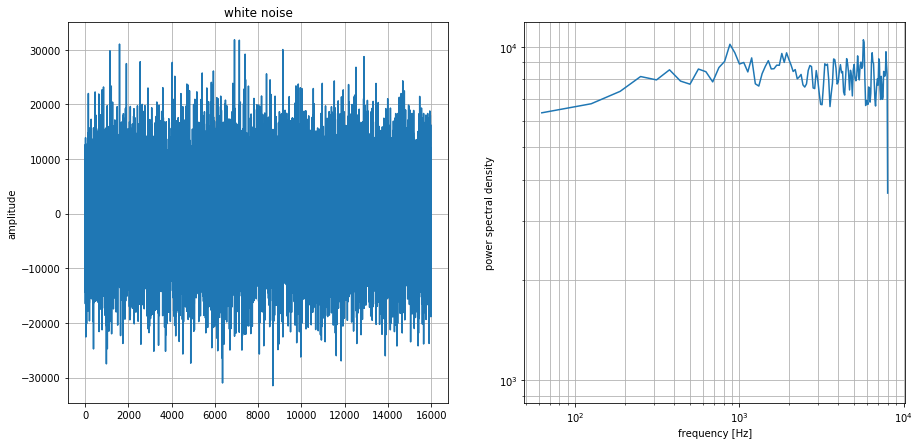

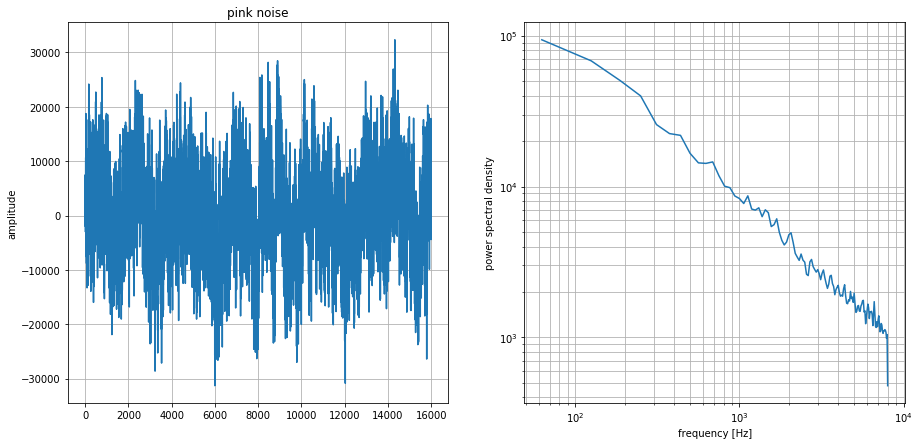

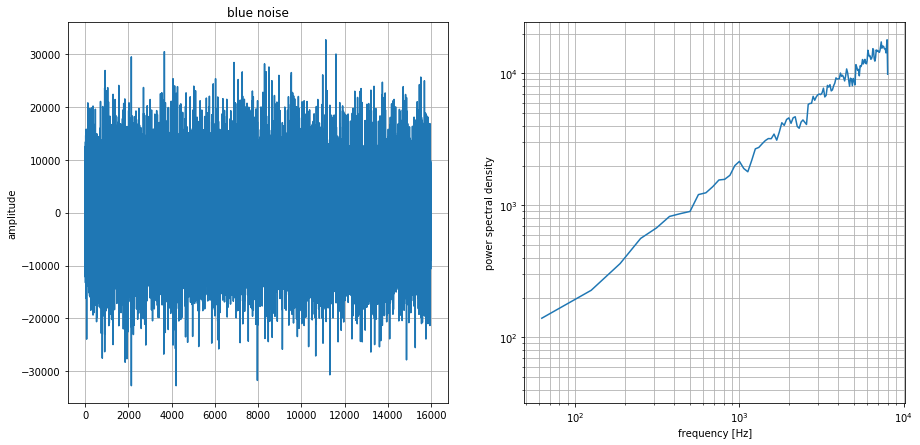

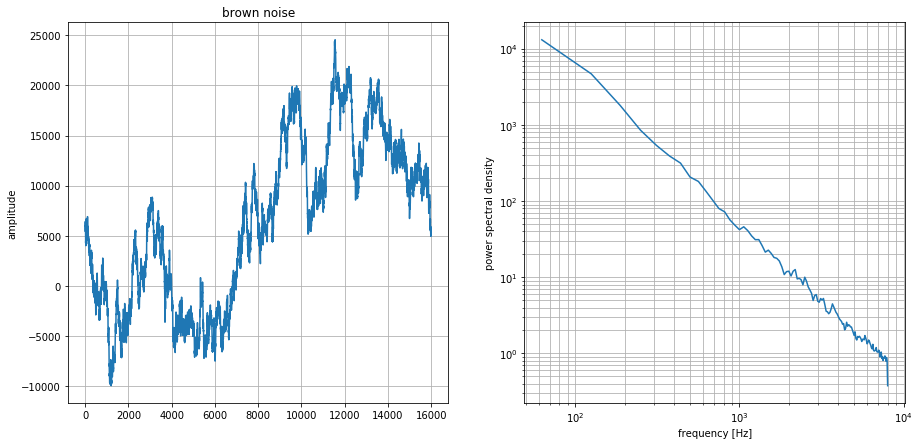

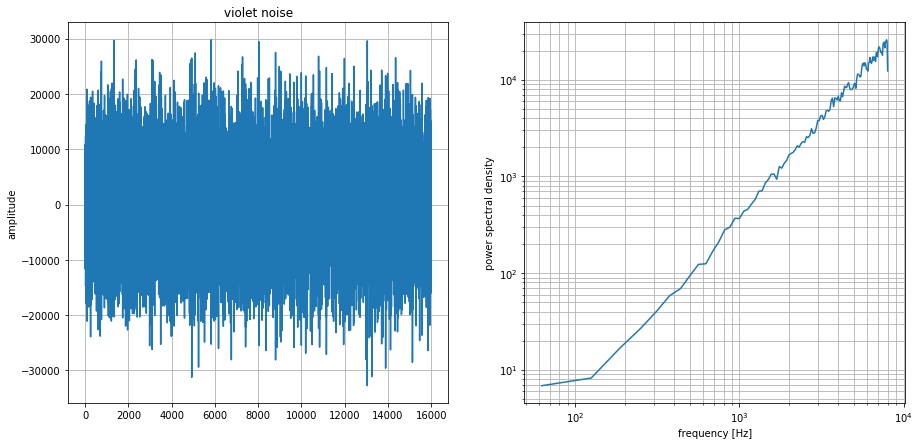

In [32]:
noise = {}

for color in ('white',   # flat spectrum
              'pink',    # -3dB (factor 0.5)  per octave / -10 dB (factor 0.1) per decade
              'blue',    # +3dB (factor 2)    per octave / +10 dB (factor 10) per decade
              'brown',   # -6dB (factor 0.25) per octave / -20 dB (factor 0.01) per decade
              'violet'): # +6dB (factor 4)    per octave / +20 dB (factor 100) per decade
    
    noise[color] = to_16bit(gen_noise(color) / 4)
    
    plt.figure(figsize = (15,7))
    
    plt.subplot(1,2,1)
    plt.plot(noise[color])
    plt.grid()
    plt.title("%s noise" % color)
    plt.ylabel('amplitude')
    
    # plot spectral power density
    plt.subplot(1,2,2)
    freqs, spec = scipy.signal.welch(noise[color], fs = sample_rate)
    
    # normalize to middle of spectrum
    # freqs -= freqs[len(freqs) // 2]
    
    plt.loglog(freqs, spec)
    plt.gca().minorticks_on()
    plt.grid(True, which = 'both')
    # plt.ylim(ymin = 0)
    plt.xlabel('frequency [Hz]')
    plt.ylabel('power spectral density')